
___
# Proyecto de regresión lineal (datos de comercio electrónico)

¡Felicidades! Acabas de obtener un contrato de trabajo con una empresa de comercio electrónico, con sede en la ciudad de Nueva York, que vende ropa en línea, pero también tienen sesiones de asesoramiento sobre estilo y ropa en la tienda.

La compañía está tratando de decidir si centrar sus esfuerzos en la aplicación móvil o en su sitio web.¡Te han contratado en contrato para que los ayudess a resolverlo!¡Empecemos!

Simplemente sigue los pasos, que verás a continuación, para analizar los datos del cliente

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar los datos

Trabajaremos con el archivo CSV de los clientes de comercio electrónico de la empresa. Tiene información del cliente, como el correo electrónico, la dirección y su avatar en color. También tiene columnas numéricas:

* Promedio Duracion sesion: El tiempo medio en las sesiones de asesoramiento en tienda.
* Tiempo en la App: Tiempo promedio dedicado a la aplicación en minutos
* Tiempo en la  Web: Tiempo promedio de permanencia en el sitio web en minutos
* Tiempo como socio: Cuánto tiempo hace que el cliente es socio.
* Gasto anual: Cantidad anual de dinero gastado por el cliente

** Cargar el archivo CSV de los clientes de comercio electrónico en un dataframe llamado clientes.**

In [5]:
clientes = pd.read_csv("EcommerceCustomers.csv")

**Consulta los datos de los clientes con los métodos  head(), info() y describe().**

In [7]:
clientes.head()

,Email,Direccion,Avatar,Promedio Duracion sesion,Tiempo en la App,Tiempo en la Web,Tiempo como socio,Gasto anual
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Email                     500 non-null    object 
 1   Direccion                 500 non-null    object 
 2   Avatar                    500 non-null    object 
 3   Promedio Duracion sesion  500 non-null    float64
 4   Tiempo en la App          500 non-null    float64
 5   Tiempo en la Web          500 non-null    float64
 6   Tiempo como socio         500 non-null    float64
 7   Gasto anual               500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
clientes.describe()

,Promedio Duracion sesion,Tiempo en la App,Tiempo en la Web,Tiempo como socio,Gasto anual
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análisis exploratorio de datos (Exploratory Data Analysis -EDA-)

### ¡Exploremos los datos!

Para el resto del ejercicio solo utilizaremos los datos numéricos del archivo CSV.
___


In [19]:
sns.set_style('whitegrid')

**Exploremos este tipo de relaciones en todo el conjunto de datos. Usa [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) Usa pairplot para crear la gráfica aquí debajo.(No te preocupes por los coloress)**

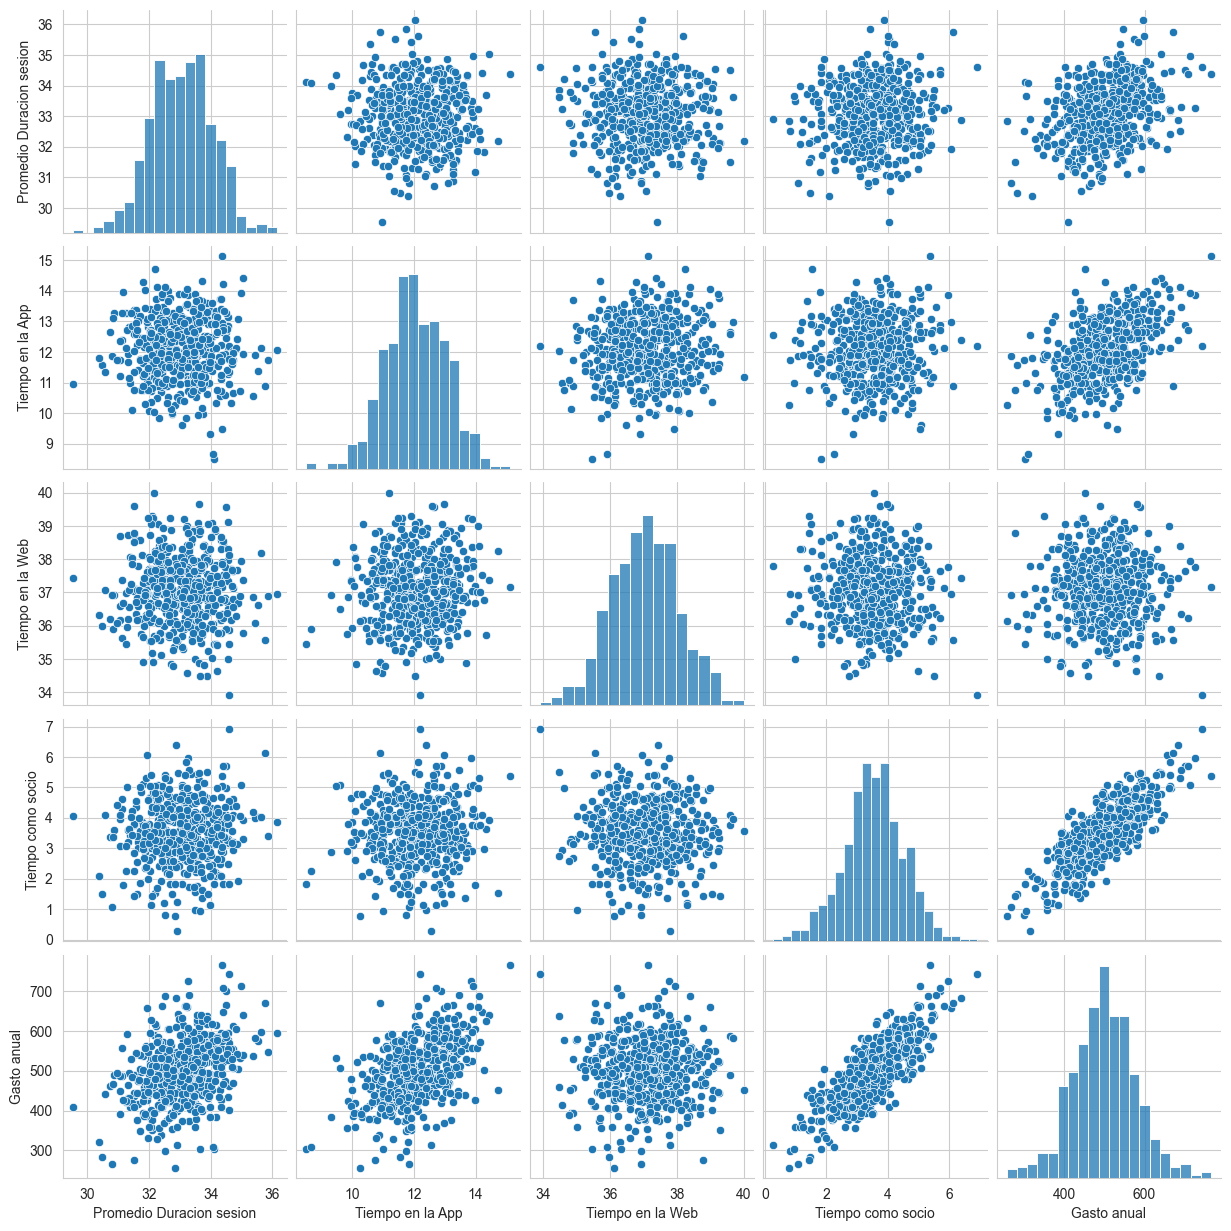

In [20]:
sns.pairplot(clientes)

**Exploremos un mapa de calor con todo el conjunto de datos. Usa headmap y no te preocues por los colores**

<Axes: >

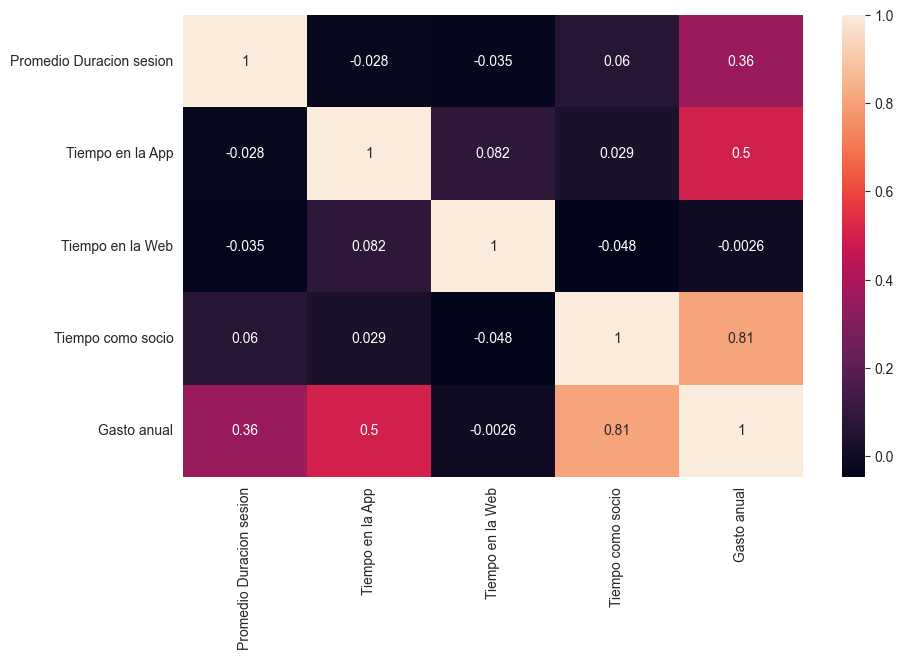

In [21]:
datos_num = clientes.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(datos_num.corr(), annot=True)

**Basado en el mapa de calor, ¿cuál es la característica más correlacionada con la cantidad anual gastada (columna Gasto anual)?**

In [ ]:
#El tiempo en la App es el más correlacionado con Gasto anual.

**Crea una gráfica de modelo lineal (usando *lmplot* de Seaborn) del Gasto Anual vs. Tiempo como socio.**

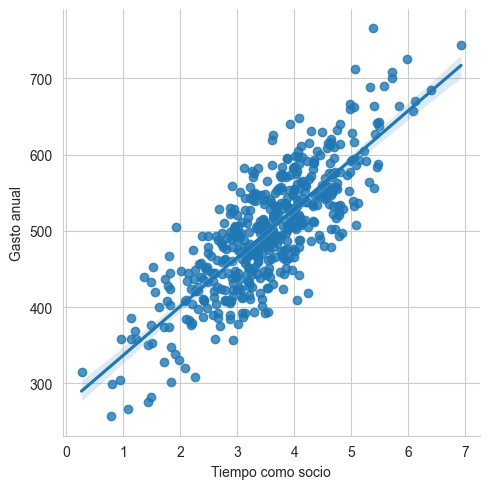

In [23]:
sns.lmplot(x='Tiempo como socio', y='Gasto anual', data=clientes)

## Datos de entrenamiento y prueba
Ahora que hemos explorado un poco los datos, sigamos adelante y dividamos los datos en conjuntos de entrenamiento y prueba.Establezca una variable **x** igual a las características numéricas de los clientes y una variable **y** igual a la columna "Gasto anual".

In [24]:
datos_num = clientes.select_dtypes(include=['float64', 'int64'])

y = datos_num['Gasto anual']

X = datos_num.drop('Gasto anual', axis=1)

**Usa model_selection.train_test_split de Sklearn para dividir los datos en conjuntos de entrenamiento y prueba. Pon test_size=0.3 y random_state=101**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

## Entrenando el modelo

Ahora es el momento de entrenar nuestro modelo con los datos de entrenamiento.

**Usando Regresión Lineal**: Import LinearRegression from sklearn.linear_model

In [26]:
from sklearn.linear_model import LinearRegression

**Crea una instancia de un modelo LinearRegression() llamado LM.**

In [27]:
lm = LinearRegression()

**Entrena/ajusta (Train/Fit) *lm* con los datos de entrenamiento.**

In [28]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Imprime los coeficientes del modelo**

In [29]:
# Los coeficientes
coeficientes = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
coeficientes

,Coeficiente
Promedio Duracion sesion,25.981550
Tiempo en la App,38.590159
Tiempo en la Web,0.190405
Tiempo como socio,61.279097


## Predecir los datos de la prueba
Ahora que hemos ajustado nuestro modelo, ¡evaluemos su rendimiento prediciendo los valores de prueba!

**Usa lm.predict() para hacer predicciones sobre el conjunto de datos de test, X_test.**

In [30]:
predicciones = lm.predict(X_test)

**Cree un diagrama de dispersión (scatterplot) de los valores de prueba reales versus los valores predichos.**

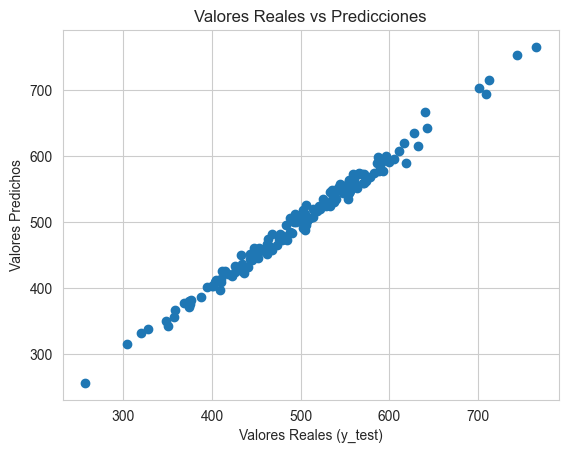

In [31]:
plt.scatter(y_test, predicciones)
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs Predicciones")
plt.show()

## Evaluación del modelo

Evaluemos el rendimiento de nuestro modelo

**Calcula el error absoluto medio, el error cuadrático medio y  el coeficiente de determianación. **


In [33]:
# ¡Calcular las métricas!
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Error absoluto medio
mae = mean_absolute_error(y_test, predicciones)

# Error cuadrático medio
mse = mean_squared_error(y_test, predicciones)

# Raíz del error cuadrático medio
rmse = np.sqrt(mse)

# Coeficiente de determinación R^2
r2 = r2_score(y_test, predicciones)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624
R2: 0.9890046246741234


## Residuos (diferencia entre el valor real y el predicho)

Deberías haber obtenido un muy buen modelo, con un buen ajuste. Exploremos rápidamente los residuos para asegurarnos de que todo está bien en nuestros datos.

**Traza un histograma de los residuos y asegúrate de que se distribuyen según una normal. Usa distplot de seaborn o bien plt.hist().**

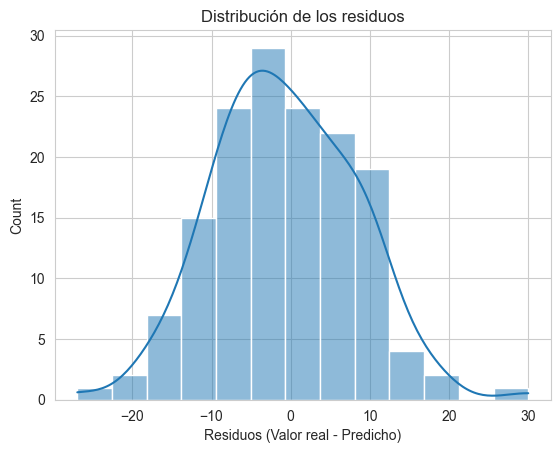

In [34]:
# Calcular los residuos
residuos = y_test - predicciones

# Graficar histograma
sns.histplot(residuos, kde=True)
plt.xlabel("Residuos (Valor real - Predicho)")
plt.title("Distribución de los residuos")
plt.show()


## Conclusión
Todavía queremos descubrir la respuesta a la pregunta original, ¿centramos el esfuerzo en la aplicación móvil o en el desarrollo del sitio web? O tal vez eso ni siquiera importa, y el tiempo como socio es lo que es realmente importa. Veamos si podemos interpretar los coeficientes para tener una idea.

**A continuación recreamos el dataframe.**

In [35]:
coeficientes = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
coeficientes


,Coeficiente
Promedio Duracion sesion,25.981550
Tiempo en la App,38.590159
Tiempo en la Web,0.190405
Tiempo como socio,61.279097


**¿Cómo podemos interpretar estos coeficientes?**

(termina de rellenar las frases, tomando como modelo la primera)
Interpretando los coeficientes:

- Manteniendo las demás características fijas, un aumento de 1 unidad en **Promedio Duracion sesion** se asocia a un aumento de **de 25.98 euros, en total, gastados**.
- Manteniendo las demás características fijas, un aumento de 1 unidad en **Tiempo en la App** va asociado a un {aquí}
- Manteniendo las demás características fijas, un aumento de 1 unidad en **Tiempo en la Web** implica
- Manteniendo las demás características fijas, un aumento de 1 unidad en **Tiempo como socio**

Cuanto mayor sea el valor, más relacionado está con el objetivo, en este caso la cantidad anual gastada (columna Gasto anual).

**¿Crees que la compañía debería centrarse más en su aplicación móvil o en su sitio web??**

Los resultados muestran que:

El tiempo en la App tiene una relación fuerte y positiva con el gasto anual.

El tiempo en la Web apenas influye en el gasto: su coeficiente es muy cercano a 0.

El tiempo como socio también influye mucho, pero no es algo que la empresa pueda cambiar directamente.

Conclusión:
La compañía debería centrarse en mejorar y potenciar la aplicación móvil, ya que el uso de la app está fuertemente asociado con un mayor gasto por parte de los clientes.

El sitio web, por el contrario, no muestra relación significativa con el gasto.


## ¡Gran trabajo!

¡Felicidades por el trabajo!